In [1]:
import tensorflow as tf
import pandas as pd
import re
import glob
import cv2

C:\Users\JanU\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [4]:
train['image'].head()
train['category'][2]

2

In [5]:
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
import numpy as np

class ImageToVec():
    
    def __init__(self):
        '''
        Constructor for SenttoVec to convert image into fixed length vectors with length 4096
        '''
        self.model = self.create_model()
    
    def get_vector(self,image_path):
        '''
        This method is used to pre-process the input image and return corresponding vector.
        Input: image_path: path where image is located.
        Returns: vector representation of the image.
        '''
        #Loading Image
        img = image.load_img(image_path, target_size=(250, 250))
        img_data = image.img_to_array(img)
        #Adding batch size dimension to the image shape to able to forward pass thorugh model
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        im_vec = self.model.predict(img_data)
        #print(im_vec.shape)
        #Reshaping 4 dimensional image vector into single dimensional vector
        im_vec = im_vec.squeeze()
        im_vec = im_vec.reshape(im_vec.shape[0]*im_vec.shape[1]*im_vec.shape[2])
        return im_vec
        
    def create_model(self):
        '''
        This method is used to build model with pretrained ResNet50.
        Returns: model
        '''
        model = ResNet50(weights='imagenet', include_top=False)
        return model

Using TensorFlow backend.


In [6]:
img_vec = ImageToVec()

C:\Users\JanU\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
DATASET_LOCATION = "images"
hcr = {"data":[], "labels":[], "cls":[]}

images = hcr.get("data")[3000:3009]
cls_true = hcr.get("cls")[3000:3009]
len(images)
plot_images(images=images, cls_true=cls_true)
ax.imshow(images[i], cmap="binary")



images/2823080.jpg


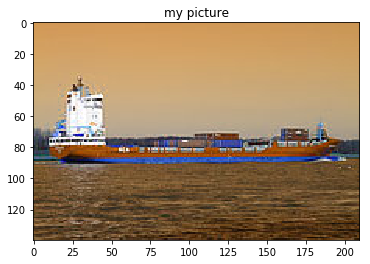

images/2870024.jpg


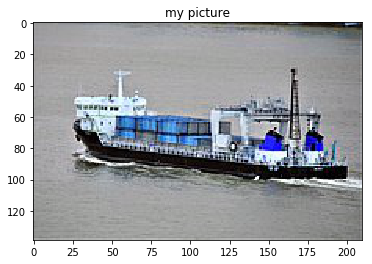

images/2662125.jpg


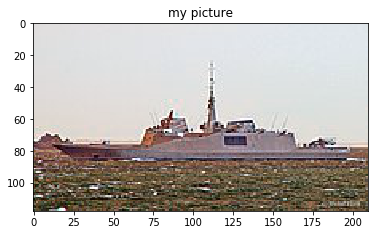

images/2900420.jpg


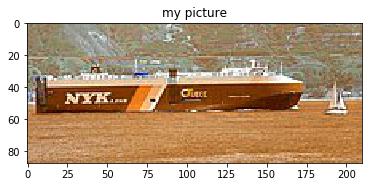

images/2804883.jpg


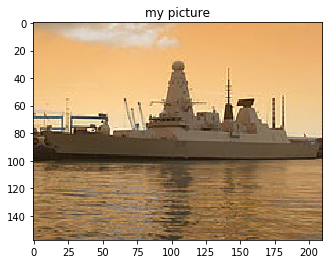

In [11]:
len(train)
DATASET_LOCATION = "images"
for i in range (5):
    img_name = train['image'][i]
    img_label= train['category'][i]
    img_path = DATASET_LOCATION + "/" + img_name
    print (img_path)
    Image_show(img_path)

In [12]:
from matplotlib import pyplot as plt

def Image_show(img_path):
    img = cv2.imread(img_path)
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img)
    plt.title('my picture')
    plt.show()

In [ ]:
print img_path